In [2]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi as PI

In [3]:
# Input steps

STEPS = 100
alpha = np.linspace(0, 0.5*PI, STEPS)

In [6]:
# Output values
F1 = 6

# sine
x1 = np.sin(F1*alpha)
x2 = np.sin(2*alpha)

# parabola
y1 = 1 - (2*F1*alpha/PI - 1)**2
y2 = 1 - (4*alpha/PI - 1)**2

# smooth pulse
X_TRANS = PI/(2*F1)

t1 = np.zeros(STEPS)
for i in range(1, STEPS):
    if alpha[i] < X_TRANS: 
        t1[i] = 1
    elif alpha[i] > X_TRANS and alpha[i] < 2*X_TRANS:
        t1[i] = 2 - alpha[i]/X_TRANS
    else:
        t1[i] = 0
                
# pulsed value
y3 = y1*t1 + y2*(1 - t1)

# smooth pulse #2
t2 = 1/( ( alpha/(X_TRANS*1.5) )**20 + 1)

y4 = y1*t2 + y2*(1 - t2)

# added difference
#t3 = t2
t3 = t2

y5 = (y1 - y2)*t3 + y2

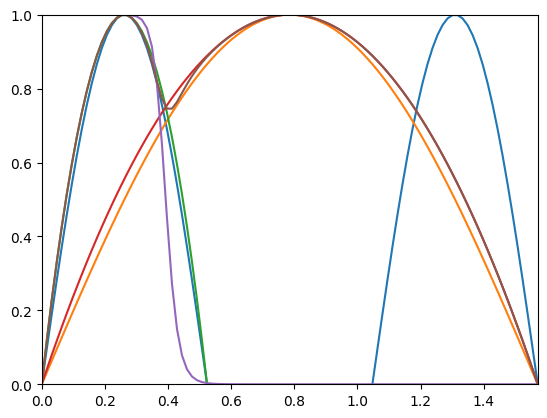

In [8]:
# Plot Coefficient

figure = plt.figure() 
axes = plt.axes( xlim=(0, 0.5*PI), ylim=(0,1) )

"""
# pulse
axes.plot(alpha, t1)
axes.plot(alpha, y3)

axes.plot(alpha, t2)
axes.plot(alpha, y4)
"""

# sine
axes.plot(alpha, x1)
axes.plot(alpha, x2)

# parabola
axes.plot(alpha, y1)
axes.plot(alpha, y2)

# mixed wave
axes.plot(alpha, t3)
axes.plot(alpha, y5)

# Lift coefficient curve
---

__Parabola curves__
```
y1 = A1(1 - (f1*x - 1)^2 )
y2 = A2(1 - (f2*x - 1)^2 )
```

__Equate parabolas__
```
y1 = y2

A1(1 - (f1*x - 1)^2 ) = A2(1 - (f2*x - 1)^2 )

1 - (f1*x - 1)^2 = A2/A1 - A2/A1*(f2*x - 1)^2

1 - A2/A1 = (f1*x - 1)^2 - A2/A1(f2*x - 1)^2
          
          = (f1*x)^2 - 2*f1*x + 1 - A2/A1( (f2*x)^2 - 2*f2*x + 1 )
          
1 - A2/A1 = (f1^2 - A2/A1*f2^2)*x^2 + 2*(A2/A1*f2 - f1)*x + (1 - A2/A1)

0 = (f1^2 - A2/A1*f2^2)*x^2 + 2*(A2/A1*f2 - f1)*x

2*(f1 - A2/A1*f2) = (f1^2 - A2/A1*f2^2)*x

x = 2*( f1 - A2/A1*f2 )/( f1^2 - A2/A1*f2^2 ) -> General solution
```

__Case 1: A1 = A2__

```
x = 2*( f1 - f2 )/( f1^2 - f2^2 )

x = 2*( f1 - f2 )/( f1 - f2 )*(f1 + f2)

x = 2/(f1 + f2) -> Intersection for equal magnitude
```


# Maximum pre-stall lift coefficient
---

__Induced drag angle__
lifting line equations:
```
cdi = cl / (PI * AR)

cl = 2*PI * aeff

aeff = a - ai
ai = cl / (PI * AR)
```

Effective angle of attack
```
aeff = a - cl/(PI*AR)
aeff = a - 2*PI*aeff / (PI*AR)
aeff = a - 2*aeff/AR

aeff(1 + 2/AR) = a

aeff = a/(1 + 2/AR)
```

induced angle
```
aeff = a - ai
ai = a - aeff 
ai = a - a/(1 + 2/AR)
ai = a(1 - 1/(1+2/AR))
ai = a(1 + 2/AR - 1)/(1 + 2/AR)

ai = a * 2/(AR + 2) -> induced angle of attack
```

__Constant effective angle of attack__

geometric stall angle
```
CLMAX = 2*PI * AMAX
AMAX = 2D stall angle

CLMAX = cl = 2*PI*aeff

AMAX = aeff = a - ai 
     = a( 1 - 2/(AR + 2) )
     = a( AR + 2 - 2 )/(AR + 2)
     = a*AR/(AR + 2)

a = ageom = AMAX*(1 + 2/AR)
```

vertical lift coefficient
```
cl_y = cos(ai)*cl

cos(ai) ~ 1 - ai^2/2

a = ageom

cl_y/cl = (1 - ai^2/2)

        = (1 - a^2 *2/(AR + 2)^2 )
        
cl_y/cl = (1 - (AMAX^2 * 2)*(1 + 2/AR)^2 /(AR + 2)^2 ) )

1 - cl_y/cl = AMAX^2 * (2/4) * (AR + 2)^2 /( (AR + 2)^2 * AR^2 ) )

cl_y / cl  = 1 - AMAX^2 /( 2*AR^2 ) 

cl_ymax = CLMAX * (1 - AMAX^2 /(2*AR^2) ) -> maximum vertical lift coefficient
```

# Force zero lift at AR = 0
---

case 1: clmax = 0
```
clmax = 1 - amax^2/(2AR^2) 
 
clmax = 0

amax^2 = 2*AR^2 

amax = sqrt(2) * AR
```

case 2A: modified offset and scale
```
clmax = 1 - amax^2/(2 * x1*(AR - x0)^2 )

clmax = 0

-amax^2 = 2 * x1 * (AR - x0)^2

AR = 0

amax^2 = -2*x1*x0^2

x1*x0^2 = -amax^2 / 2
```
case 2B: half scale
```
x1 = 1/2

x0^2 = -amax^2

clmax = 1 - amax^2/(AR - amax)^2

clmax = 1 - 1/(AR/max - 1)^2 -> modified lift scalar 
```

/tmp/ipykernel_1876/4086385217.py:6: RuntimeWarning: divide by zero encountered in divide
  clmax = 1 - ( amax**2 / (2 * ar**2) )


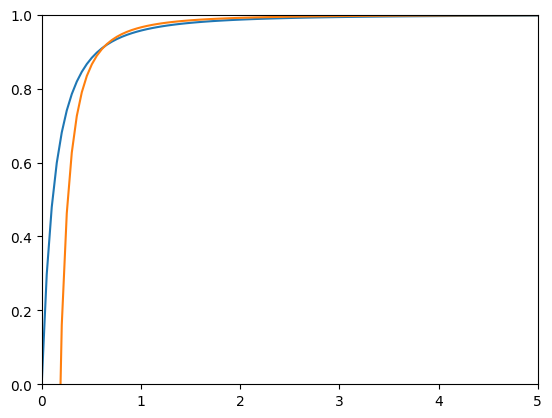

In [28]:
# aspect ratio
ar = np.linspace(0.0, 5, STEPS)

# case 1
amax = 15 * PI/180
clmax = 1 - ( amax**2 / (2 * ar**2) )

# case 2
clmax2 = 1 - 1/(ar/amax + 1)**2

# plot of normalized max cl
figure = plt.figure() 
axes = plt.axes( xlim=(0.0, 5), ylim=(0,1) )

axes.plot(ar, clmax2)
axes.plot(ar, clmax)